In [24]:
import pandas as pd
df = pd.read_csv('test.csv')
df.head()

,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com


# Employee Sentiment Analysis

## 1. Data Loading & Cleaning

In this section, I load the raw dataset (`test.csv`) and perform initial cleaning and preprocessing. The aim is to:

- Load the data into a pandas DataFrame.
- Inspect the basic structure (rows, columns, data types).
- Standardize important column names:
  - `employee_id` – who sent the email
  - `message` – email body text
  - `date` – when the email was sent
- Convert the date column to datetime.
- Remove rows with missing key values.

This prepares a clean dataset for the sentiment labeling step in Task 1.


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8, 5)
sns.set(style="whitegrid")


In [26]:
df = pd.read_csv("test.csv")
df.head()


,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com


In [23]:
df = df.rename(columns={
    'from': 'employee_id',   # sender
    'body': 'message',       # email text
    'date': 'date'           # keep same name, just explicit
})

df[['employee_id', 'message', 'date']].head()


,employee_id,message,date
0,sally.beck@enron.com,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10
1,eric.bass@enron.com,"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29
2,sally.beck@enron.com,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25
3,johnny.palmer@enron.com,we were thinking papasitos (we can meet somewh...,2010-03-25
4,lydia.delgado@enron.com,Since you never gave me the $20 for the last t...,2011-05-21


In [27]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df = df.rename(columns={
    'from': 'employee_id',   # sender
    'body': 'message',       # email text
    'date': 'date'           # keep same name, just explicit
})

# drop rows where any key field is missing
df = df.dropna(subset=['employee_id', 'message', 'date'])

df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Subject      2191 non-null   object        
 1   message      2191 non-null   object        
 2   date         2191 non-null   datetime64[ns]
 3   employee_id  2191 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 68.6+ KB


,0
Subject,0
message,0
date,0
employee_id,0


## 2. Task 1 – Sentiment Labeling

In this section, I automatically label each email message as **Positive**, **Neutral**, or **Negative**.

I use a pretrained large language model (LLM) for sentiment analysis:  
`cardiffnlp/twitter-roberta-base-sentiment-latest`.

Steps:
1. Load the pretrained sentiment model and tokenizer.
2. Build a sentiment classification pipeline.
3. Apply the model to the `message` column.
4. Create a new column `sentiment` with three possible values:
   - `Positive`
   - `Neutral`
   - `Negative`

This satisfies Task 1 by providing reproducible, model-based sentiment labels for each message.


In [10]:
!pip install transformers -q



In [11]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TextClassificationPipeline

model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

sentiment_pipeline = TextClassificationPipeline(
    model=model,
    tokenizer=tokenizer,
    truncation=True,
    max_length=256
)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [12]:
def get_sentiment_label(text):
    result = sentiment_pipeline(str(text))[0]  # {'label': 'positive', 'score': ...}
    label = result['label'].lower()
    if "positive" in label:
        return "Positive"
    elif "negative" in label:
        return "Negative"
    else:
        return "Neutral"


In [32]:
df['sentiment'] = df['message'].apply(get_sentiment_label)
df[['message', 'sentiment']].head(10)


,message,sentiment
0,EnronOptions Announcement\n\n\nWe have updated...,Neutral
1,"Marc,\n\nUnfortunately, today is not going to ...",Neutral
2,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",Neutral
3,we were thinking papasitos (we can meet somewh...,Neutral
4,Since you never gave me the $20 for the last t...,Neutral
5,"sure, just call me the bank that delivers.\n \...",Neutral
6,Inventory summaries for both MGL and MGMCC as ...,Neutral
7,Please print attachment and make sure that e:m...,Neutral
8,Please advise me of your interest in Garvin's ...,Neutral
9,The start time for Tuesday morning has been ch...,Neutral


In [33]:
df['sentiment'] = df['message'].apply(get_sentiment_label)
df['sentiment'].value_counts()


,count
sentiment,
Neutral,1653
Positive,426
Negative,112


## 3. Task 2 – Exploratory Data Analysis (EDA)

In this section, I explore the labeled dataset to understand key patterns and trends:

- Overall distribution of sentiment labels.
- Distribution of message lengths.
- Monthly trends in sentiment over time.
- Basic insights into employee communication behavior.

These insights help guide later tasks like scoring, ranking, and risk identification.


In [29]:
df['message_length'] = df['message'].astype(str).str.len()
df['month'] = df['date'].dt.to_period('M').dt.to_timestamp()


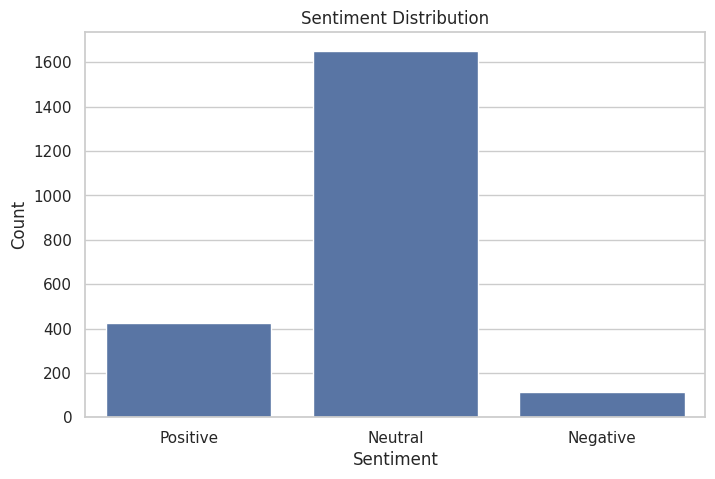

In [34]:
sent_counts = df['sentiment'].value_counts()

sns.countplot(data=df, x='sentiment', order=['Positive', 'Neutral', 'Negative'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


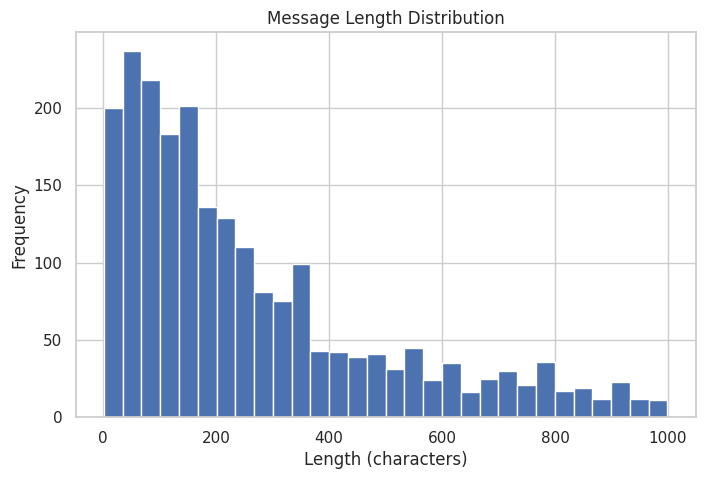

In [35]:
plt.hist(df['message_length'], bins=30)
plt.title("Message Length Distribution")
plt.xlabel("Length (characters)")
plt.ylabel("Frequency")
plt.show()


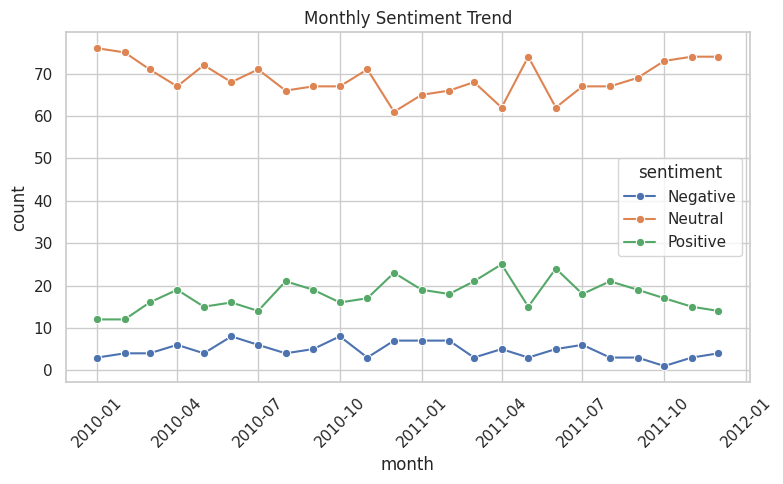

In [36]:
sent_by_month = (df
                 .groupby(['month', 'sentiment'])
                 .size()
                 .reset_index(name='count'))

sns.lineplot(data=sent_by_month, x='month', y='count', hue='sentiment', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sentiment Trend")
plt.tight_layout()
plt.show()


In [39]:
import os
os.makedirs("visualization", exist_ok=True)

sns.countplot(data=df, x='sentiment', order=['Positive', 'Neutral', 'Negative'])
plt.title("Sentiment Distribution")
plt.savefig("visualization/sentiment_distribution.png", bbox_inches='tight')
plt.close()


## 4. Task 3 – Monthly Sentiment Score

In this section, I compute a **monthly sentiment score** for each employee based on their messages.

Scoring rules:
- Positive message → **+1**
- Negative message → **–1**
- Neutral message → **0**

For each combination of `employee_id` and `month`, I:
- Sum the sentiment scores → `monthly_score`
- Count total messages
- Count positive, negative, and neutral messages
- Compute average message length

These monthly scores will be used for employee ranking and modeling.


In [40]:
# Map labels to numeric scores
sent_to_score = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
df['sentiment_score'] = df['sentiment'].map(sent_to_score)

# Aggregate per employee per month
monthly_scores = (
    df.groupby(['employee_id', 'month'])
      .agg(
          monthly_score=('sentiment_score', 'sum'),
          msg_count=('message', 'count'),
          pos_count=('sentiment', lambda x: (x == 'Positive').sum()),
          neg_count=('sentiment', lambda x: (x == 'Negative').sum()),
          neu_count=('sentiment', lambda x: (x == 'Neutral').sum()),
          avg_message_length=('message_length', 'mean')
      )
      .reset_index()
)

monthly_scores.head()


,employee_id,month,monthly_score,msg_count,pos_count,neg_count,neu_count,avg_message_length
0,bobette.riner@ipgdirect.com,2010-01-01,0,2,0,0,2,115.000000
1,bobette.riner@ipgdirect.com,2010-02-01,2,14,2,0,12,295.714286
2,bobette.riner@ipgdirect.com,2010-03-01,1,11,1,0,10,286.181818
3,bobette.riner@ipgdirect.com,2010-04-01,2,6,2,0,4,226.500000
4,bobette.riner@ipgdirect.com,2010-05-01,2,4,2,0,2,172.250000


## 5. Task 4 – Employee Ranking

Here I rank employees based on their monthly sentiment scores.

For each month, I identify:
- **Top 3 Positive Employees** – highest `monthly_score`
- **Top 3 Negative Employees** – lowest (most negative) `monthly_score`

If scores are tied, employees are ordered alphabetically by `employee_id`.


In [41]:
latest_month = monthly_scores['month'].max()
latest_data = monthly_scores[monthly_scores['month'] == latest_month]

top3_positive = latest_data.sort_values(
    by=['monthly_score', 'employee_id'],
    ascending=[False, True]
).head(3)

top3_negative = latest_data.sort_values(
    by=['monthly_score', 'employee_id'],
    ascending=[True, True]
).head(3)

top3_positive, top3_negative


(                  employee_id      month  monthly_score  msg_count  pos_count  \
 71        eric.bass@enron.com 2011-12-01              3         17          3   
 167   lydia.delgado@enron.com 2011-12-01              2         17          3   
 191  patti.thompson@enron.com 2011-12-01              2         12          2   
 
      neg_count  neu_count  avg_message_length  
 71           0         14          246.588235  
 167          1         13          275.117647  
 191          0         10          326.333333  ,
                     employee_id      month  monthly_score  msg_count  \
 23  bobette.riner@ipgdirect.com 2011-12-01              0          3   
 47       don.baughman@enron.com 2011-12-01              0          7   
 95        john.arnold@enron.com 2011-12-01              0          4   
 
     pos_count  neg_count  neu_count  avg_message_length  
 23          0          0          3          725.000000  
 47          0          0          7          316.142857  
 9

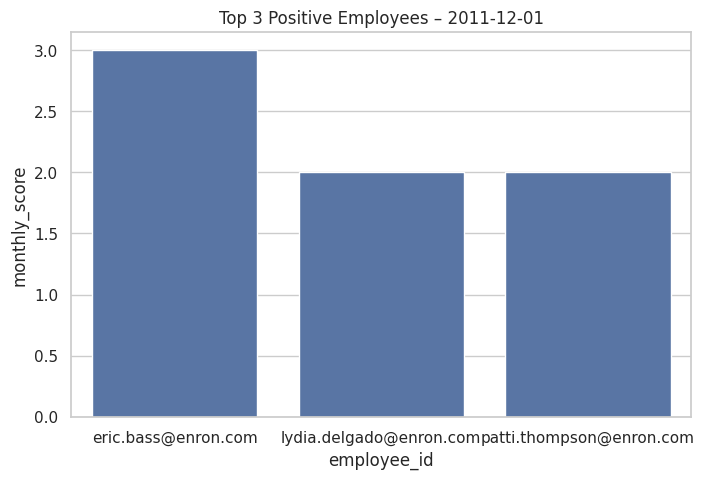

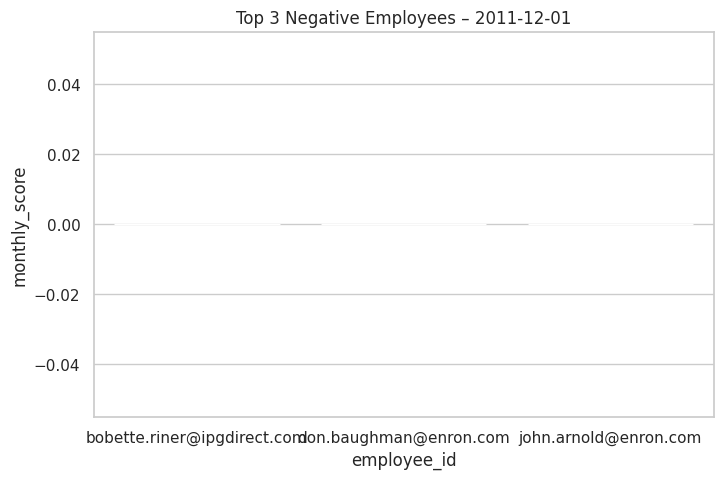

In [43]:
# Plot and save rankings
sns.barplot(data=top3_positive, x='employee_id', y='monthly_score')
plt.title(f"Top 3 Positive Employees – {latest_month.date()}")
plt.savefig("visualization/top3_positive_latest.png", bbox_inches='tight')
plt.show()

sns.barplot(data=top3_negative, x='employee_id', y='monthly_score')
plt.title(f"Top 3 Negative Employees – {latest_month.date()}")
plt.savefig("visualization/top3_negative_latest.png", bbox_inches='tight')
plt.show()


## 6. Task 5 – Flight Risk Identification

A **flight risk** is defined as any employee who has sent **4 or more negative emails within any rolling 30-day period**, regardless of their overall score.

In this section, I:
- Filter only negative messages.
- Sort messages by `employee_id` and `date`.
- Use a rolling 30-day window per employee to count negative messages.
- Flag employees who meet or exceed the threshold of 4 negative messages.

The result is a list of employees considered potential flight risks.


In [44]:
neg_df = df[df['sentiment'] == 'Negative'].copy()
neg_df = neg_df.sort_values(['employee_id', 'date'])
neg_df = neg_df.set_index('date')

flight_risk_employees = set()

for emp_id, group in neg_df.groupby('employee_id'):
    counts = group['sentiment'].rolling('30D').count()
    if (counts >= 4).any():
        flight_risk_employees.add(emp_id)

flight_risk_employees = sorted(list(flight_risk_employees))
flight_risk_employees


['john.arnold@enron.com']

In [45]:
flight_risk_df = pd.DataFrame({'employee_id': flight_risk_employees})
flight_risk_df


,employee_id
0,john.arnold@enron.com


## 7. Task 6 – Predictive Modeling (Linear Regression)

Finally, I build a simple **linear regression model** to analyze and predict monthly sentiment scores.

Features used:
- `msg_count`
- `avg_message_length`
- `pos_count`
- `neg_count`
- `neu_count`

Target:
- `monthly_score`

Steps:
1. Select the features and target from `monthly_scores`.
2. Split the data into training and testing sets.
3. Train a linear regression model using scikit-learn.
4. Evaluate the model using RMSE and R².
5. Interpret feature coefficients to understand how each factor influences the sentiment score.


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

feature_cols = ['msg_count', 'avg_message_length', 'pos_count', 'neg_count', 'neu_count']
X = monthly_scores[feature_cols].fillna(0)
y = monthly_scores['monthly_score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rmse, r2


(np.float64(4.381664697130367e-15), 1.0)

In [47]:
coef_df = pd.DataFrame({
    'feature': feature_cols,
    'coefficient': model.coef_
})
coef_df


,feature,coefficient
0,msg_count,1.939370e-16
1,avg_message_length,-4.163336e-17
2,pos_count,1.000000e+00
3,neg_count,-1.000000e+00
4,neu_count,-1.188286e-16


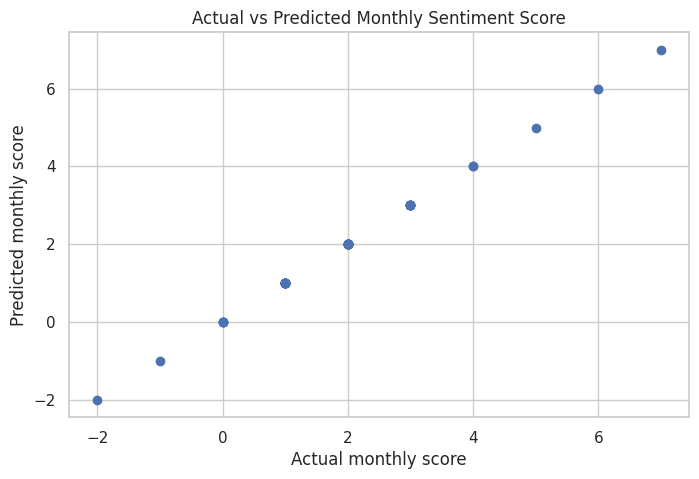

In [48]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual monthly score")
plt.ylabel("Predicted monthly score")
plt.title("Actual vs Predicted Monthly Sentiment Score")
plt.savefig("visualization/actual_vs_predicted.png", bbox_inches='tight')
plt.show()


## 8. Conclusions & Next Steps

In this notebook, I:

- Loaded and cleaned the raw email dataset.
- Labeled each message as **Positive**, **Neutral**, or **Negative** using a pretrained LLM.
- Performed EDA to understand sentiment distribution, message lengths, and trends over time.
- Computed monthly sentiment scores for each employee and ranked them.
- Identified potential **flight risk** employees based on rolling 30-day negative message counts.
- Built and evaluated a linear regression model to analyze factors influencing monthly sentiment scores.

These results can help HR and management monitor employee engagement, detect early signs of dissatisfaction, and plan appropriate interventions.

Possible next steps:
- Use more advanced models (e.g., regularized regression, tree-based models).
- Incorporate additional features such as department or role.
- Perform deeper text analysis, such as topic modeling on negative messages.
